In [2]:
import pandas as pd
df = pd.read_csv('loan.csv', low_memory=False)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
# Iterate through each column in the DataFrame
for column in df.columns:
    print(f"Column Name: {column}")
    print(f"Data Type: {df[column].dtype}")
    print(f"Sample Values:\n{df[column].head()}")
    print("-" * 50)  # Separator for better readability


Column Name: id
Data Type: int64
Sample Values:
0    1077501
1    1077430
2    1077175
3    1076863
4    1075358
Name: id, dtype: int64
--------------------------------------------------
Column Name: member_id
Data Type: int64
Sample Values:
0    1296599
1    1314167
2    1313524
3    1277178
4    1311748
Name: member_id, dtype: int64
--------------------------------------------------
Column Name: loan_amnt
Data Type: int64
Sample Values:
0     5000
1     2500
2     2400
3    10000
4     3000
Name: loan_amnt, dtype: int64
--------------------------------------------------
Column Name: funded_amnt
Data Type: int64
Sample Values:
0     5000
1     2500
2     2400
3    10000
4     3000
Name: funded_amnt, dtype: int64
--------------------------------------------------
Column Name: funded_amnt_inv
Data Type: float64
Sample Values:
0     4975.0
1     2500.0
2     2400.0
3    10000.0
4     3000.0
Name: funded_amnt_inv, dtype: float64
--------------------------------------------------
Column Na

In [4]:
unique_loan_statuses = df['loan_status'].unique()
unique_loan_statuses

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [5]:
defaulted_loans = df[df['loan_status'].isin(['Charged Off'])]
defaulted_loans['loan_amnt'].describe()


,loan_amnt
count,5627.000000
mean,12104.385108
std,8085.732038
min,900.000000
25%,5600.000000
50%,10000.000000
75%,16500.000000
max,35000.000000


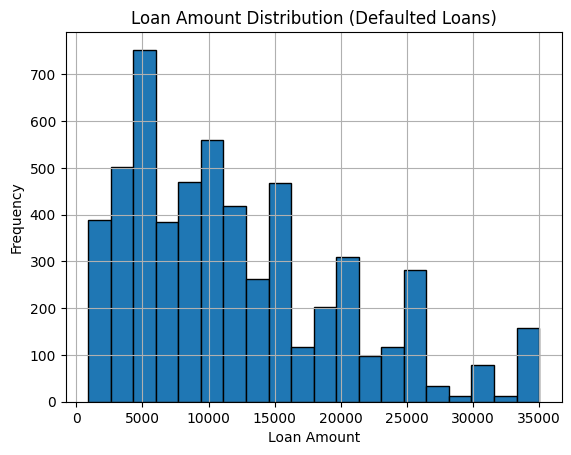

In [6]:
# Analysing frequency of defaulted loan amounts
import matplotlib.pyplot as plt

defaulted_loans['loan_amnt'].hist(bins=20, edgecolor='black')
plt.title('Loan Amount Distribution (Defaulted Loans)')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()
# This shows loans of amount 5000 are defaulted frequently

<ipython-input-7-4954d7feed01>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defaulted_loans['annual_inc_thousands'] = defaulted_loans['annual_inc'] / 1000


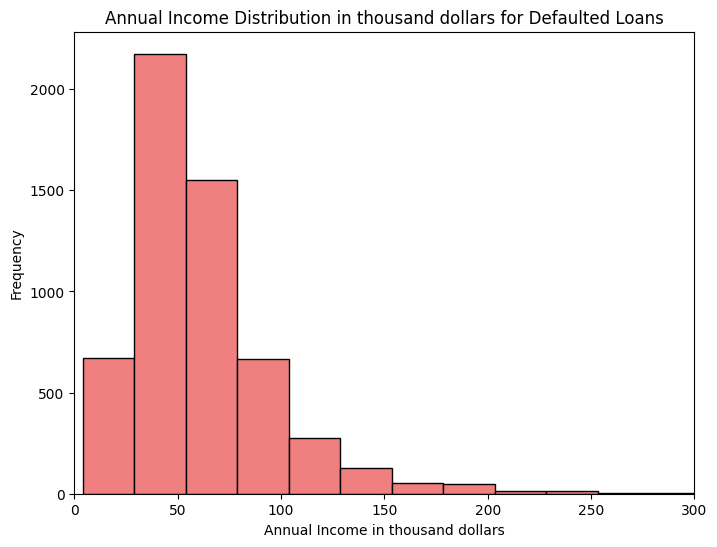

In [7]:
# Visualize the distribution of annual income for defaulted loans
defaulted_loan_income = defaulted_loans['annual_inc']
defaulted_loans['annual_inc_thousands'] = defaulted_loans['annual_inc'] / 1000
plt.figure(figsize=(8, 6))
plt.hist(defaulted_loans['annual_inc_thousands'].dropna(), bins=50, edgecolor='black', color='lightcoral')
plt.title('Annual Income Distribution in thousand dollars for Defaulted Loans')
plt.xlabel('Annual Income in thousand dollars')
plt.ylabel('Frequency')
plt.xlim(0, 300)
plt.show()
# borrowers with lesser annual income i.e. in the range of 50000 dollars or less are defaulting more

In [9]:
# Calculate the total number of loans
total_loans = len(df)  # Assuming df is the DataFrame containing all loans

# Calculate the number of defaulted loans (e.g., where loan status is 'Charged Off')
defaulted_loans_count = len(defaulted_loans)  # Assuming defaulted_loans is the DataFrame with defaulted loans

# Calculate the percentage of defaulted loans
defaulted_percentage = (defaulted_loans_count / total_loans) * 100

print(f"Percentage of defaulted loans: {defaulted_percentage:.2f}%")

Percentage of defaulted loans: 14.17%


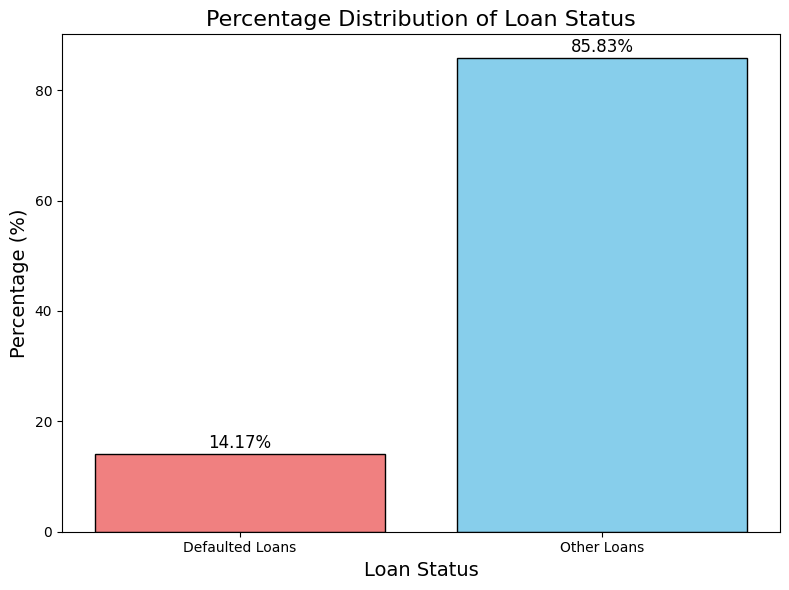

In [10]:
import matplotlib.pyplot as plt

# Assuming the calculations are done
categories = ['Defaulted Loans', 'Other Loans']
percentages = [defaulted_percentage, 100 - defaulted_percentage]  # Defaulted and Non-Defaulted percentages

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(categories, percentages, color=['lightcoral', 'skyblue'], edgecolor='black')

# Add titles and labels
plt.title('Percentage Distribution of Loan Status', fontsize=16)
plt.xlabel('Loan Status', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)

# Annotate the bars with percentage values
for i, value in enumerate(percentages):
    plt.text(i, value + 1, f'{value:.2f}%', ha='center', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


<ipython-input-9-0c79f4aef5e6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=purpose_counts.index, y=purpose_counts.values, palette='viridis')


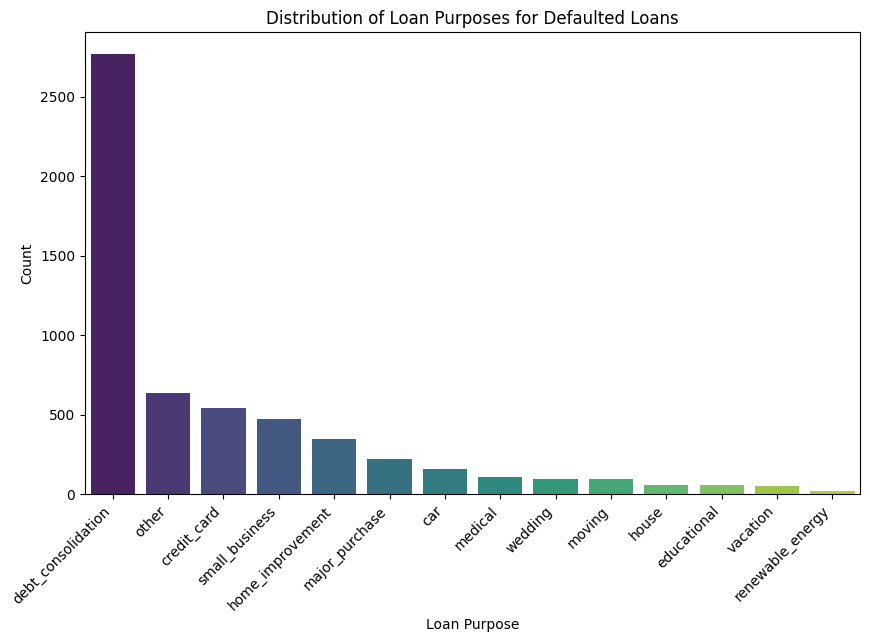

In [9]:
# Calculate the counts of loan purposes for defaulted loans
purpose_counts = defaulted_loans['purpose'].value_counts()

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=purpose_counts.index, y=purpose_counts.values, palette='viridis')
plt.title('Distribution of Loan Purposes for Defaulted Loans')
plt.xlabel('Loan Purpose')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()
# Most of the borrowers who have defaulted have taken loan for debt consolidation

In [10]:
# Filter the defaulted loans where annual income is less than loan amount
defaulted_loans_low_income = defaulted_loans[defaulted_loans['annual_inc'] < defaulted_loans['loan_amnt']]

# Check the number of records
defaulted_loans_low_income.shape
# this shows there are no loans being disbursed to people with annual income lesser than loan amount

(0, 112)

<ipython-input-11-93edccec12bc>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=verification_defaulted.index, y=verification_defaulted.values, palette="viridis")


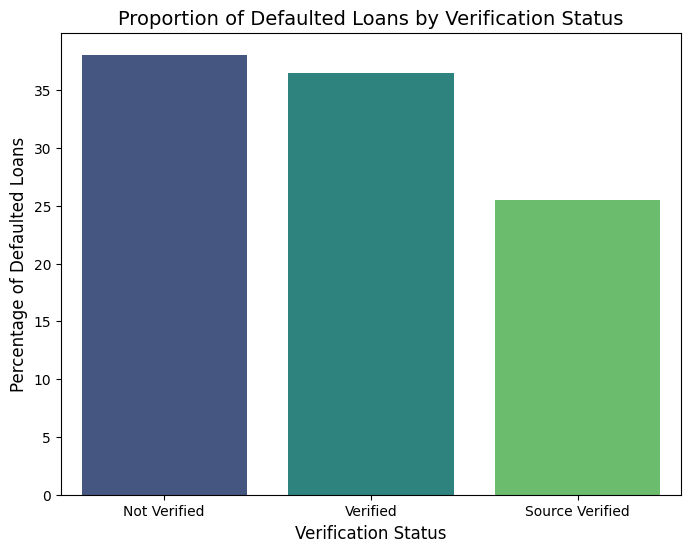

In [11]:
# Count of defaulted loans by verification status
verification_defaulted = defaulted_loans['verification_status'].value_counts(normalize=True) * 100

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x=verification_defaulted.index, y=verification_defaulted.values, palette="viridis")
plt.title('Proportion of Defaulted Loans by Verification Status', fontsize=14)
plt.xlabel('Verification Status', fontsize=12)
plt.ylabel('Percentage of Defaulted Loans', fontsize=12)
plt.show()

# This shows there are majority of loans out of defaulted loans which were earlier not verified

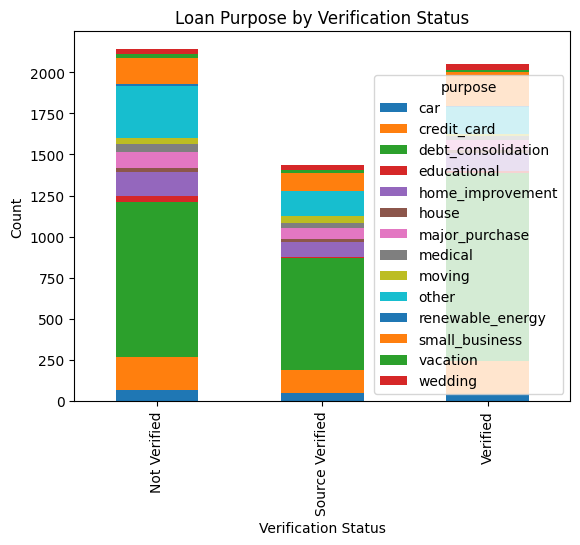

In [12]:
pd.crosstab(defaulted_loans['verification_status'], defaulted_loans['purpose']).plot(kind='bar', stacked=True)
plt.title('Loan Purpose by Verification Status')
plt.xlabel('Verification Status')
plt.ylabel('Count')
plt.show()
# vacation is the major reason for loan across all verification statuses
# wedding is the top most reason for which people are taking loans

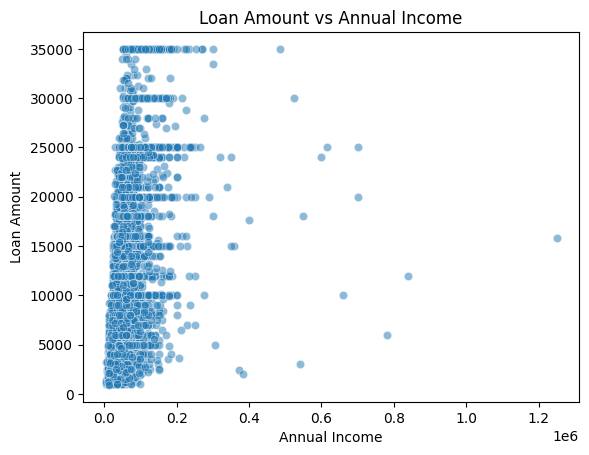

In [14]:
sns.scatterplot(data=defaulted_loans, x='annual_inc', y='loan_amnt', alpha=0.5)
plt.title('Loan Amount vs Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.show()
# People with lesser annual income are more likely to default on loans

home_ownership
RENT        0.504532
MORTGAGE    0.413542
OWN         0.078728
OTHER       0.003199
Name: proportion, dtype: float64


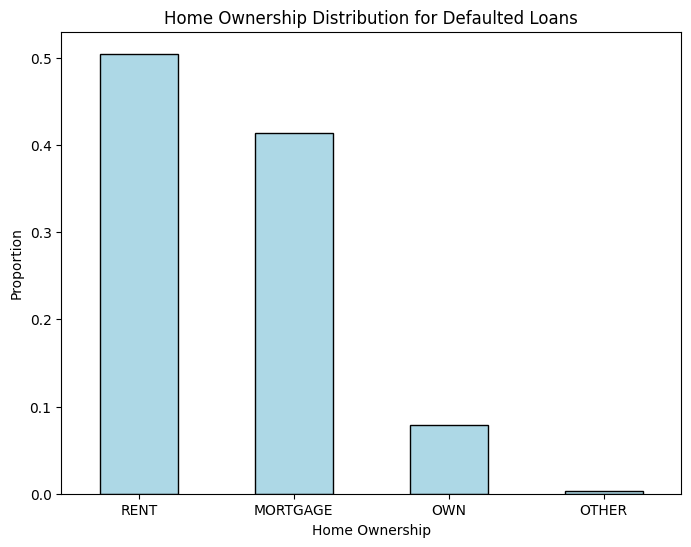

In [18]:
defaulted_home_ownership = defaulted_loans['home_ownership'].value_counts(normalize=True)
print(defaulted_home_ownership)

# Visualizing the home ownership for defaulted loans
plt.figure(figsize=(8, 6))
defaulted_home_ownership.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title("Home Ownership Distribution for Defaulted Loans")
plt.xlabel("Home Ownership")
plt.ylabel("Proportion")
plt.xticks(rotation=0)
plt.show()
# People who own the house have defaulted the least

In [20]:
# Count total loans by purpose
total_loans_by_purpose = df['purpose'].value_counts()

# Count defaulted loans by purpose
defaulted_loans_by_purpose = defaulted_loans['purpose'].value_counts()

# Calculate default rates
default_rate_by_purpose = (defaulted_loans_by_purpose / total_loans_by_purpose) * 100
default_rate_by_purpose = default_rate_by_purpose.sort_values(ascending=False)

print(default_rate_by_purpose)


purpose
small_business        25.984683
renewable_energy      18.446602
educational           17.230769
other                 15.852742
moving                15.780446
house                 15.485564
medical               15.295815
debt_consolidation    14.843624
vacation              13.910761
home_improvement      11.659946
credit_card           10.565302
car                   10.329245
major_purchase        10.150892
wedding               10.137276
Name: count, dtype: float64


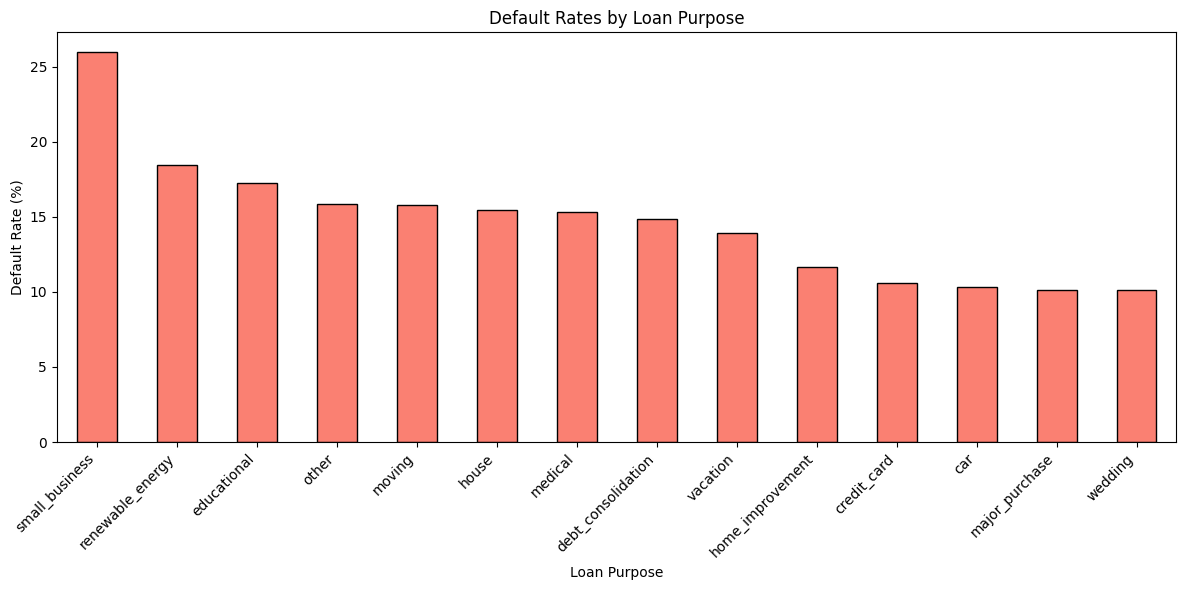

In [21]:
plt.figure(figsize=(12, 6))
default_rate_by_purpose.plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Default Rates by Loan Purpose')
plt.xlabel('Loan Purpose')
plt.ylabel('Default Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
# Loans taken for small businesses and renewable energy purposes have the highest default rates, exceeding 25%